1.5381818181818183 -2707.254545454546
     Years  CO2 Level (ppm)
0   1980.0       338.700000
1   1982.0       341.100000
2   1984.0       344.400000
3   1986.0       347.200000
4   1988.0       351.500000
5   1990.0       354.200000
6   1992.0       356.400000
7   1994.0       358.900000
8   1996.0       362.600000
9   1998.0       366.600000
10  2000.0       369.400000
11  2001.0       370.647273
12  2002.0       372.185455
13  2003.0       373.723636
14  2004.0       375.261818
15  2005.0       376.800000
16  2006.0       378.338182
17  2007.0       379.876364
18  2008.0       381.414545
19  2009.0       382.952727
20  2010.0       384.490909
21  2011.0       386.029091
22  2012.0       387.567273
23  2013.0       389.105455
24  2014.0       390.643636
25  2015.0       392.181818
26  2016.0       393.720000
27  2017.0       395.258182
28  2018.0       396.796364
29  2019.0       398.334545
30  2020.0       399.872727


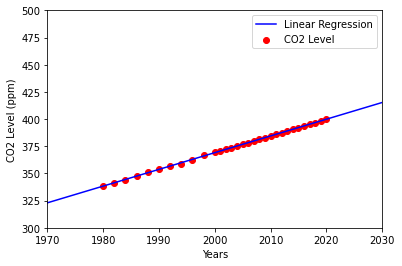

1.3919729352550418


In [62]:
#Importing the required libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#Adding values to the dataset
dataset = pd.DataFrame(np.array([[1980,338.7], [1982,341.1], [1984,344.4], [1986,347.2], [1988,351.5], [1990,354.2], [1992,356.4], [1994,358.9], [1996,362.6], [1998,366.6], [2000,369.4]]), columns=['Years', 'CO2 Level (ppm)'])
#Adding values to the axis 
X = dataset['Years'].values
Y = dataset['CO2 Level (ppm)'].values
#Calculating the mean 
x_mean = np.mean(X)
y_mean = np.mean(Y)
total_no_of_values = len(X) #Stores the total number of values
#Formula to calculate the m and b
numerator = 0
denominator = 0
for i in range(total_no_of_values):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
m = numerator / denominator
b = y_mean - (m * x_mean)
print(m, b)


# Predicting and organizing future values

future_times = np.array([range(2001,2021)])
prediction_val_2020 = b + m* future_times # Using found m and b values to determine future values
predicted_array = np.concatenate((future_times.T, prediction_val_2020.T), axis = 1)

# Converting array into a data frame and appending it to original
predicted_dataset = pd.DataFrame(predicted_array, columns = ['Years', 'CO2 Level (ppm)'])
dataset = dataset.append(predicted_dataset, ignore_index = True)

# Updating X, and Y matrices for plotting
X = dataset['Years'].values
Y = dataset['CO2 Level (ppm)'].values

# Display table
print(dataset)

#Plotting values using matplotlib
x_max = np.max(X) + 100
x_min = np.min(X) - 100
x = np.linspace(x_min, x_max, 1000)
y = b + m * x

#Plotting line 
plt.plot(x, y, color='blue', label='Linear Regression')
#Plot the data point
plt.scatter(X, Y, color='red', label='CO2 Level')
plt.xlabel('Years') #X-axis label
plt.ylabel('CO2 Level (ppm)') #Y-axis label
plt.axis([1970, 2030, 300, 500]) #Axis limit
plt.legend()
plt.show()

RootMeanSquaredError = 0
for i in range(total_no_of_values):
    y_pred = b + m * X[i]
    RootMeanSquaredError += (Y[i] - y_pred) ** 2
RootMeanSquaredError = np.sqrt(RootMeanSquaredError/m)
print(RootMeanSquaredError)